/tmp/nix-shell.0TTg6m/ipykernel_96357/766744805.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  distances[i, 0] = np.abs(data[i, 0] - x)


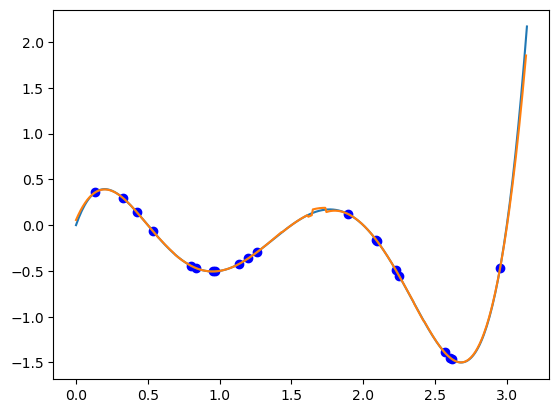

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_data(a, b, n, f):
    results_x = []

    for num in range(n):
      rand_number = random.random() * (b - a) + a
      results_x.append(rand_number)

    results_y = [f(x) for x in results_x]
    f = open("data.txt", "w")
    
    for i in range(n):
      f.write(str(results_x[i]) + " " + str(results_y[i]) + "\n")

    f.close()


def x_interpolation(a, b, n):
    result = np.zeros(shape=(n,1))

    for i in range(1, n + 1):
        result[i-1]=((a+(i-1)*(b-a))/n)

    return result

def get_nearest_points(data, count, x, balanced_count):
    distances = np.zeros(shape=(len(data), 3))
    for i in range(len(data)):
        distances[i, 0] = np.abs(data[i, 0] - x)
        distances[i, 1] = data[i, 1]
        distances[i, 2] = data[i, 0]

    distances = distances[distances[:, 0].argsort()]
    distances = np.column_stack((distances[:, 1], distances[:, 2]))


    return distances[:count]

def lagrange_interpolation(data, interpolated_x, degree):
    results = []
    for x in interpolated_x:
        points = get_nearest_points(data, degree+1, x, 2)
        result = 0
        for i in range(degree+1):
            term = 1
            for j in range(degree+1):
                if i != j:
                    term *= (x - points[j, 1]) / (points[i, 1] - points[j, 1])
            result += term * points[i, 0]
        results.append(result)
    return results

def cos3x(x):
    return np.cos(6*x)

def abc(x):
    return (x-1/2)*(x-1.5)*(x-2)*(x-3)*x

def main():
    generate_data(0, np.pi, 20, abc)
    data = np.loadtxt('data.txt')
    
    x = data[:, 0]
    y = data[:, 1]
    data = data[data[:,0].argsort()]

    a = np.min(x)
    b = np.max(x)

    N = len(x)
    N_squared = N**2

    test = x_interpolation(0,np.pi, N_squared)
    results = lagrange_interpolation(data, test, 3)
    plt.plot(data[:,0], data[:,1], 'bo')
    x_test = np.arange(0, np.pi, 0.01)
    y_test = abc(x_test)
    plt.plot(x_test, y_test)
    plt.plot(test,results)


if __name__ == '__main__':
    main()
